In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [83]:
df = pd.read_csv('data.csv')
print(df.head())

   Distance   Force    2s + d  1/sqrt(Force)
0    0.0002  0.0082  0.004493      11.043153
1    0.0003  0.0054  0.004693      13.608276
2    0.0004  0.0035  0.004893      16.903085
3    0.0005  0.0026  0.005093      19.611614
4    0.0006  0.0021  0.005293      21.821789


In [84]:
df['Distance_Error'] = 0.0000195 
df['Force_Error'] = 0.000678

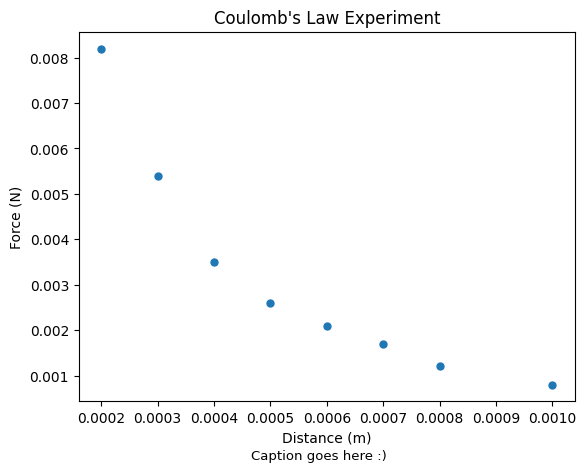

In [85]:
plt.errorbar(df['Distance'], df['Force'], fmt='o', markersize=5, capsize=3)

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment')
plt.figtext(0.5, -0.01, "Caption goes here :)", wrap=True, horizontalalignment='center', fontsize=9.5)

plt.show()

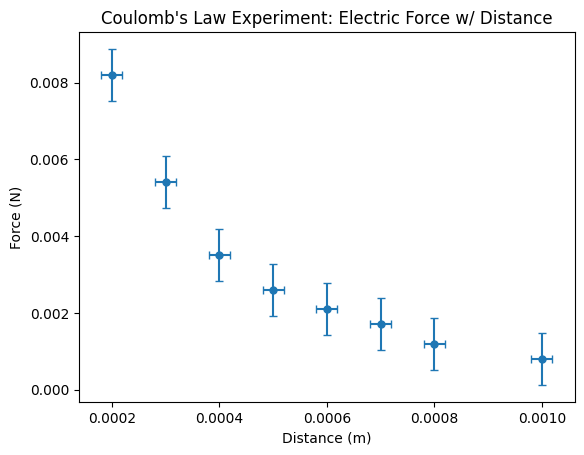

In [86]:
plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=5, capsize=3)

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment: Electric Force w/ Distance')

plt.show()

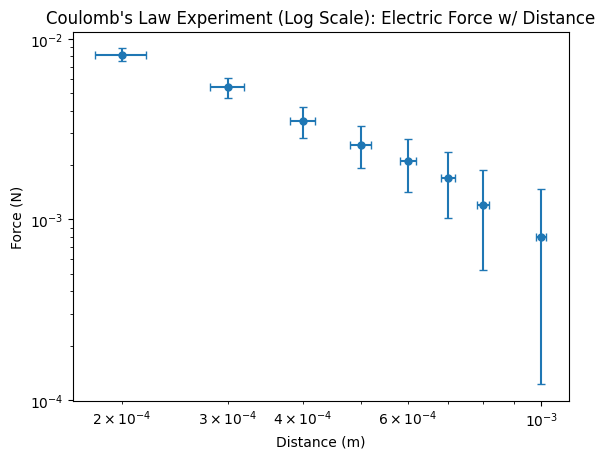

In [87]:
plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=5, capsize=3)

# Using a logarithmic scale on both axes
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('Coulomb\'s Law Experiment (Log Scale): Electric Force w/ Distance')

plt.show()

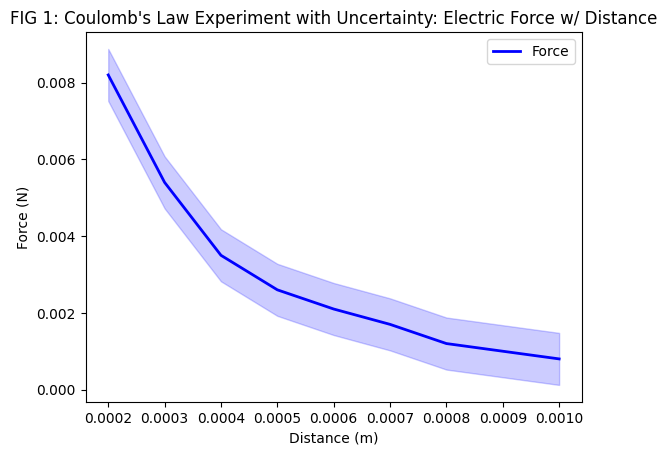

In [88]:
import matplotlib.pyplot as plt

# {We have to sort data for a smoother line graph}
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

# LINE GRAPH WITH SHADED(!!) UNCERTAINTY AREA :)
plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2)

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('FIG 1: Coulomb\'s Law Experiment with Uncertainty: Electric Force w/ Distance')

plt.legend()

plt.show()


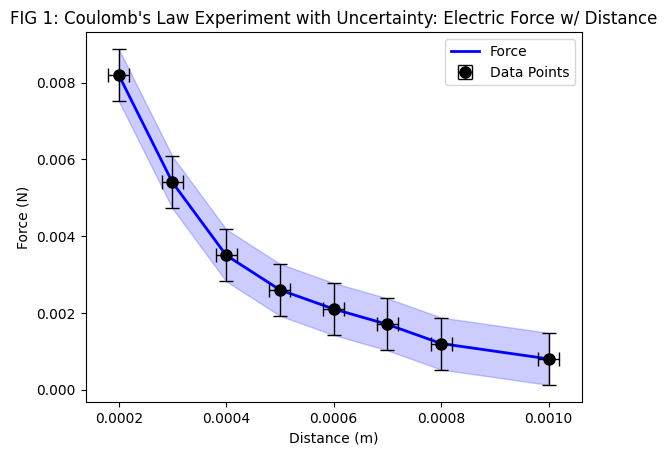

In [89]:
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2)

# Implementing fmt='o' as well as a legend.
plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=8, capsize=5, color='blue', ecolor='black', elinewidth=1, markeredgecolor='black', markerfacecolor='black', label='Data Points')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('FIG 1: Coulomb\'s Law Experiment with Uncertainty: Electric Force w/ Distance')

plt.legend()

plt.show()

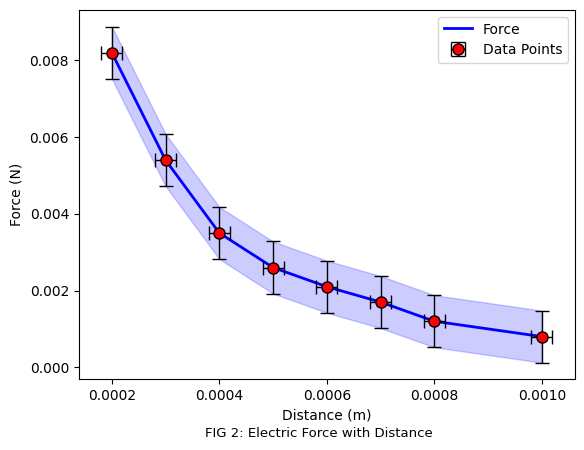

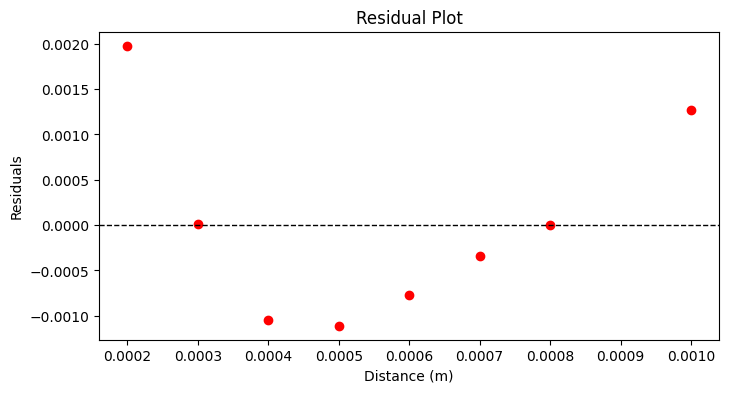

In [90]:
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

# Residual calculation
residuals = df['Force'] - np.polyval(np.polyfit(df['Distance'], df['Force'], 1), df['Distance'])

plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2)

plt.errorbar(df['Distance'], df['Force'], xerr=df['Distance_Error'], yerr=df['Force_Error'], fmt='o', markersize=8, capsize=5, color='red', ecolor='black', elinewidth=1, markeredgecolor='black', markerfacecolor='red', label='Data Points')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.figtext(0.5, -0.01, "FIG 2: Electric Force with Distance", wrap=True, horizontalalignment='center', fontsize=9.5)

plt.legend()

# Residual plot
plt.figure(figsize=(8, 4))
plt.scatter(df['Distance'], residuals, marker='o', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Distance (m)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

**We've attempted a variety of different graphs that both display our data well (or not well) and some of them are worthy candidates for the Graphical Excellence Award. We now must siphon it down to one or two for the lab report itself.**

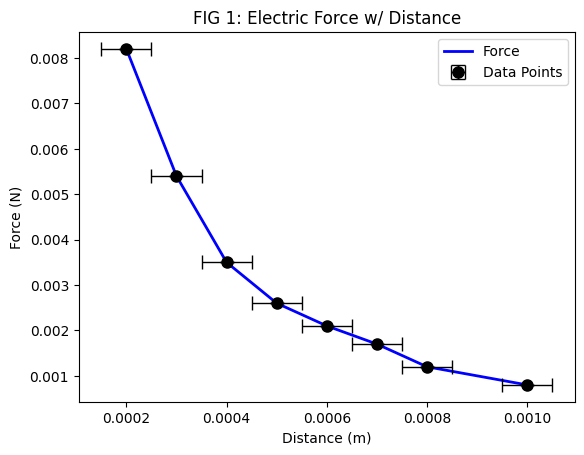

In [91]:
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)

# Implementing fmt='o' as well as a legend.
plt.errorbar(df['Distance'], df['Force'], xerr=0.00005, yerr=0, fmt='o', markersize=8, capsize=5, color='blue', ecolor='black', elinewidth=1, markeredgecolor='black', markerfacecolor='black', label='Data Points')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('FIG 1: Electric Force w/ Distance')

plt.legend()

plt.show()

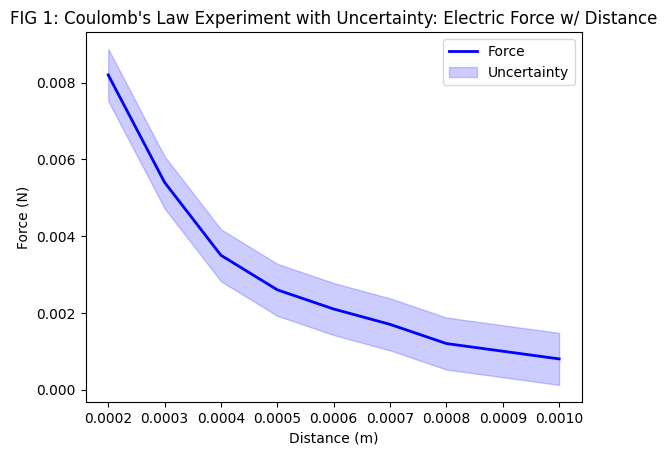

In [92]:
# {We have to sort data for a smoother line graph}
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

# LINE GRAPH WITH SHADED(!!) UNCERTAINTY AREA :)
plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2, label='Uncertainty')

plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.title('FIG 1: Coulomb\'s Law Experiment with Uncertainty: Electric Force w/ Distance')

plt.legend()

plt.show()

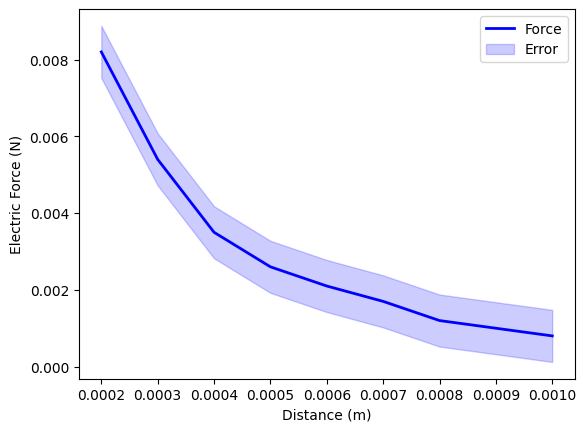

In [93]:
# {We have to sort data for a smoother line graph}
sorted_indices = df['Distance'].argsort()
sorted_distance = df['Distance'][sorted_indices]
sorted_force = df['Force'][sorted_indices]
sorted_distance_error = df['Distance_Error'][sorted_indices]
sorted_force_error = df['Force_Error'][sorted_indices]

# LINE GRAPH WITH SHADED(!!) UNCERTAINTY AREA :)
plt.plot(sorted_distance, sorted_force, label='Force', color='blue', linewidth=2)
plt.fill_between(sorted_distance, sorted_force - sorted_force_error, sorted_force + sorted_force_error, color='blue', alpha=0.2, label='Error')

plt.xlabel('Distance (m)')
plt.ylabel('Electric Force (N)')
# plt.figtext(0.5, -0.01, "Figure 2: Electric Force with Distance, with error bars represented as a shaded area.", wrap=True, horizontalalignment='center', fontsize=9.5)

plt.legend()

plt.show()